<a href="https://colab.research.google.com/github/Chirag314/AdaBoost-breastcancerdata/blob/main/ADABoost_breastcancerdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is made from exercises from book Ensemble Machine Learning Cookbook.

In [1]:
#import required libraries

import seaborn as sns
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score,r2_score,roc_curve, auc

from sklearn import metrics

In [2]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter07/breastcancer.csv'
df_breastcancer = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_breastcancer.head(5))

  diagnosis        id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M    842302        17.99         10.38          122.80     1001.0   
1         M    842517        20.57         17.77          132.90     1326.0   
2         M  84300903        19.69         21.25          130.00     1203.0   
3         M  84348301        11.42         20.38           77.58      386.1   
4         M  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

In [3]:
#Notice that the diagnosis variable has values such as M and B, representing Malign and Benign, respectively. We will perform label encoding on the diagnosis variable so that we can convert the M and B values into numeric values.
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
df_breastcancer['diagnosis']=lb.fit_transform(df_breastcancer['diagnosis'])
df_breastcancer.head()


,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#Check for missing data
df_breastcancer.isnull().sum()

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
df_breastcancer.describe()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# Create feature and response variables
X=df_breastcancer.iloc[:,2:31]

Y=df_breastcancer['diagnosis']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3,random_state=0,stratify=Y)

In [10]:
# Before we build our first AdaBoost model, let's train our model using the DecisionTreeClassif
dtree=DecisionTreeClassifier(max_depth=3,random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
#Check accuracy and AUC
print('Mean accuracy is :',(dtree.score(X_test,Y_test))*100,'%')

#Auc score
y_pred_dtree=dtree.predict_proba(X_test)
fpr_dtree,tpr_dtree,thresholds=roc_curve(Y_test,y_pred_dtree[:,1])
auc_dtree=auc(fpr_dtree,tpr_dtree)
print('AUC score is :',auc_dtree)

Mean accuracy is : 91.81286549707602 %
AUC score is : 0.9161799065420559


#####build our AdaBoost model using the scikit-learn library. We will use the AdaBoostClassifier to build our AdaBoost model. AdaBoost uses dtree as the base classifier by default

In [13]:
AdaBoost=AdaBoostClassifier(n_estimators=100,base_estimator=dtree,learning_rate=0.1,random_state=0)
AdaBoost.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=100, random_state=0)

In [14]:
#WWe check the accuracy and AUC value of the model on our test data:
print('The mean accuracy is : ',(AdaBoost.score(X_test,Y_test))*100,'%')
y_pred_adaboost=AdaBoost.predict_proba(X_test)
fpr_ab,tpr_ab,threshold=roc_curve(Y_test,y_pred_adaboost[:,1])
auc_adaboost=auc(fpr_ab,tpr_ab)
print('AUC value: ',auc_adaboost)

The mean accuracy is :  91.22807017543859 %
AUC value:  0.9733498831775702


#####We notice that we get an accuracy score of 92.82% and an AUC value of 0.97. Both of these metrics are higher than the decision tree model we built in Step 1. Then, we must fine-tune our hyperparameters. We set n_estimators to 100 and learning_rate to 0.4:

In [16]:
Adaboost_with_tuning=AdaBoostClassifier(n_estimators=100,base_estimator=dtree,learning_rate=0.4,random_state=0)
Adaboost_with_tuning.fit(X_train,Y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=0),
                   learning_rate=0.4, n_estimators=100, random_state=0)

In [18]:
# Check accuracy and AUC with our new model
print('The mean accuracy is : ',(Adaboost_with_tuning.score(X_test,Y_test))*100,'%')
#AUC score
y_pred_adaboost_tune=Adaboost_with_tuning.predict_proba(X_test)
fpr_ab_tune, tpr_ab_tune, thresholds=roc_curve(Y_test,y_pred_adaboost_tune[:,1])
auc_adaboost_tune=auc(fpr_ab_tune,tpr_ab_tune)
print('AUC value : ',auc_adaboost_tune)

The mean accuracy is :  95.32163742690058 %
AUC value :  0.9837908878504673


By default, AdaBoost uses a decision tree as the base learner. We can use different base learners as well. In the following example, we have used an SVM as our base learner with the AdaBoost algorithm. We use SVC with rbf as the kernel:

In [20]:
from sklearn.svm import SVC

adaboost_withsvc_rbf=AdaBoostClassifier(n_estimators=100,base_estimator=SVC(probability=True,kernel='rbf'),learning_rate=1,random_state=0)
adaboost_withsvc_rbf.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=SVC(probability=True), learning_rate=1,
                   n_estimators=100, random_state=0)

We can check the accuracy and the AUC values of our AdaBoost model with support vector classifier (SVC) as the base learner:

In [21]:
#Mean Accuracy
print('Mean accuracy is:',(adaboost_withsvc_rbf.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_svc_rbf=adaboost_withsvc_rbf.predict_proba(X_test)
fpr_svc_rbf,tpr_svc_rbf,thresholds=roc_curve(Y_test,y_pred_svc_rbf[:,1])
auc_svc_rbf=auc(fpr_svc_rbf,tpr_svc_rbf)
print('AUC score :',auc_svc_rbf)

Mean accuracy is: 90.64327485380117 %
AUC score : 0.9650992990654206


Now, we will rebuild our AdaBoost model with SVC. This time, we will use a linear kernel:

In [22]:
Adaboost_with_svc_linear=AdaBoostClassifier(n_estimators=100,base_estimator=SVC(probability=True,kernel='linear'),learning_rate=1,random_state=0)
Adaboost_with_svc_linear.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True),
                   learning_rate=1, n_estimators=100, random_state=0)

In [23]:
#Mean Accuracy
print('Mean accuracy is:',(Adaboost_with_svc_linear.score(X_test,Y_test))*100,'%')

#AUC score
y_pred_svc_linear=Adaboost_with_svc_linear.predict_proba(X_test)
fpr_svc_lin,tpr_svc_lin,thresholds=roc_curve(Y_test,y_pred_svc_linear[:,1])
auc_svc_lin=auc(fpr_svc_lin,tpr_svc_lin)
print('AUC score :',auc_svc_lin)

Mean accuracy is: 77.19298245614034 %
AUC score : 0.966267523364486


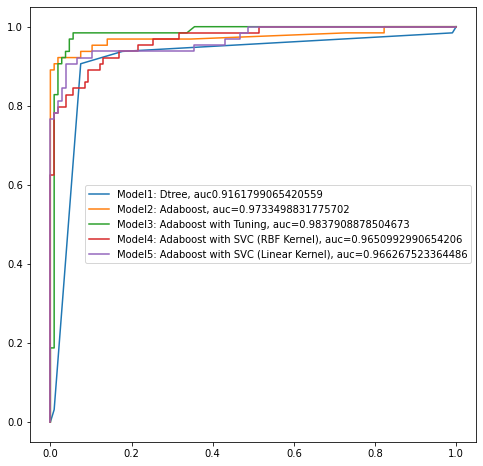

In [24]:
#We will now plot a graph to compare the AUC value of each model using the following code:
plt.figure(figsize=(8,8))

plt.plot(fpr_dtree,tpr_dtree,label='Model1: Dtree, auc'+str(auc_dtree))
plt.plot(fpr_ab, tpr_ab,label="Model2: Adaboost, auc="+str(auc_adaboost))
plt.plot(fpr_ab_tune,tpr_ab_tune,label="Model3: Adaboost with Tuning, auc="+str(auc_adaboost_tune))
plt.plot(fpr_svc_rbf, tpr_svc_rbf, label="Model4: Adaboost with SVC (RBF Kernel), auc="+str(auc_svc_rbf))
plt.plot(fpr_svc_lin, tpr_svc_lin, label="Model5: Adaboost with SVC (Linear Kernel), auc="+str(auc_svc_lin))

plt.legend(loc=5)
plt.show()

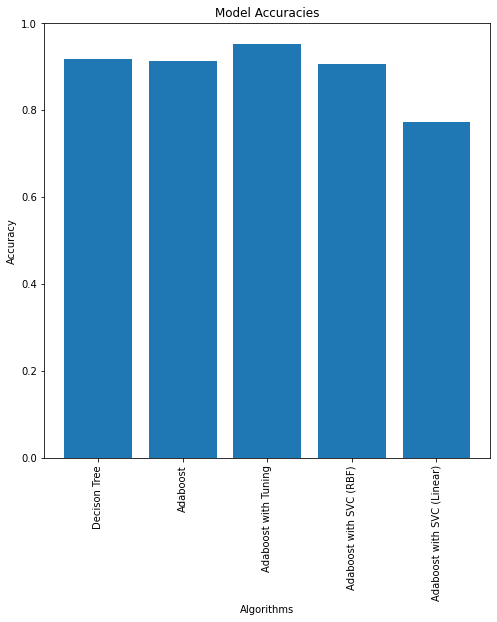

In [25]:
#We can also plot the accuracy of all the models with the following code:
plt.figure(figsize=(8,8))

label = ['Decison Tree', 'Adaboost', 'Adaboost with Tuning', 'Adaboost with SVC (RBF)', 'Adaboost with SVC (Linear)']

values = [dtree.score(X_test,Y_test),
        AdaBoost.score(X_test,Y_test),
        Adaboost_with_tuning.score(X_test,Y_test),
        adaboost_withsvc_rbf.score(X_test,Y_test),
        Adaboost_with_svc_linear.score(X_test,Y_test)]

def plot_bar_accuracy():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Algorithms', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Model Accuracies')
    plt.show()

plot_bar_accuracy()